In [1]:
def init(popsize,n): 
    population=[]
    for i in range(popsize):
        pop=''
        for j in range(n):
            pop=pop+str(np.random.randint(0,2))
        population.append(pop)    
    return population

In [2]:
def decode(x,n,w,c,W):
    s=[]
    g=0
    f=0
    for i in range(n):
        if (x[i] == '1'):
            if g+w[i] <= W:
                g = g+w[i]
                f = f+c[i]
                s.append(i)
            else:
                break
    return f,s

In [3]:
#適応度関数
def fitnessfun(population,n,w,c,W):
    value=[]
    ss=[]
    for i in range(len(population)):
        [f,s]= decode(population[i],n,w,c,W)
        value.append(f)
        ss.append(s)
    return value,ss

In [4]:
#ルーレット選択
def roulettewheel(population,value,pop_num):
    fitness_sum=[]
    value_sum=sum(value)
    fitness=[i/value_sum for i in value]
    for i in range(len(population)):##
        if i==0:
            fitness_sum.append(fitness[i])
        else:
            fitness_sum.append(fitness_sum[i-1]+fitness[i])
    population_new=[]
    for j in range(pop_num):###
        r=np.random.uniform(0,1)
        for i in range(len(fitness_sum)):###
            if i==0:
                if r>=0 and r<=fitness_sum[i]:
                    population_new.append(population[i])
            else:
                if r>=fitness_sum[i-1] and r<=fitness_sum[i]:
                    population_new.append(population[i])
    return population_new

In [5]:
#交叉
def crossover(population_new,pc,ncross):
    a=int(len(population_new)/2)
    parents_one=population_new[:a]
    parents_two=population_new[a:]
    np.random.shuffle(parents_one)
    np.random.shuffle(parents_two)
    offspring=[]
    for i in range(a):
        r=np.random.uniform(0,1)
        if r<=pc:
            point1=np.random.randint(0,(len(parents_one[i])-1))
            point2=np.random.randint(point1,len(parents_one[i]))
            off_one=parents_one[i][:point1]+parents_two[i][point1:point2]+parents_one[i][point2:]
            off_two=parents_two[i][:point1]+parents_one[i][point1:point2]+parents_two[i][point2:]
            ncross = ncross+1
        else:
            off_one=parents_one[i]
            off_two=parents_two[i]
        offspring.append(off_one)
        offspring.append(off_two)
    return offspring

In [6]:
#突然変異
def mutation(offspring,pm,nmut):
    for i in range(len(offspring)):
        for j in range(len(offspring[i])):
            r=np.random.uniform(0,1)
            if r<=pm:
                if j==0:
                    if offspring[i][j]=='1':
                        offspring[i]='0'+offspring[i][1:]
                    else:
                        offspring[i]='1'+offspring[i][1:]
                else:
                    if offspring[i][j]=='1':
                        offspring[i]=offspring[i][:(j-1)]+'0'+offspring[i][j:]
                    else:
                        offspring[i]=offspring[i][:(j-1)]+'1'+offspring[i][j:]
                nmut = nmut+1
    return offspring

In [7]:
import numpy as np
import matplotlib.pyplot as plt

gen=500
pc=0.85
pm=0.06
popsize=50 #個体数
n = 20
w = [8,6,2,3,5,3,4,3,4,5,5,2,5,5,2,5,3,5,8,4]
c = [12,18,29,25,1,22,13,11,6,16,5,9,19,13,10,15,10,3,19,31]
W = 35

population=init(popsize,n)

value,s = fitnessfun(population,n,w,c,W)

ncross=0
nmut=0
t=[]
best_ind=[]
last=[]
realvalue=[]
x=[]
for i in range(gen):
    a = 0
    avg = 0
    #交叉
    offspring_c=crossover(population,pc,ncross)
    #変異
    offspring_m=mutation(offspring_c,pm,nmut)
    mixpopulation=population+offspring_m
    #適応度関数
    value,s = fitnessfun(mixpopulation,n,w,c,W)
    for j in range(50):
        a = (a + value[0])
    avg = a/50
    x.append(avg)
    #ルーレット選択
    population=roulettewheel(mixpopulation,value,popsize)
    result=[]
    if i==gen-1:
            value1,s1 = fitnessfun(population,n,w,c,W)
            realvalue=s1
            result=value1
            last=value1
    else:
            value1,s1 = fitnessfun(population,n,w,c,W)
            result=value1
    maxre=max(result)
    h=result.index(max(result))
    t.append(maxre)
    best_ind.append(population[h])
    best_value=max(t)
print(best_value)
hh=t.index(max(t))
f2,s2 = decode(best_ind[hh],n,w,c,W)
print("最適な組み合わせは：")
print(s2)
print("最適な結果は：")
print(f2)
print("最適解が現れる代数：")
print(hh)

186
最適な組み合わせは：
[2, 3, 5, 6, 7, 9, 12, 14, 16, 19]
最適な結果は：
186
最適解が現れる代数：
11


Text(0, 0.5, 'the optimal function value of each generation')

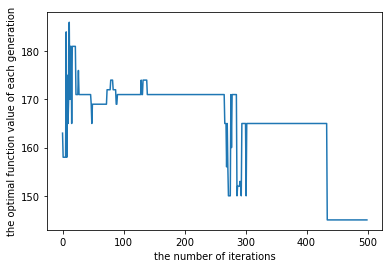

In [8]:
plt.plot(t)
plt.xlabel('the number of iterations')
plt.ylabel('the optimal function value of each generation')

Text(0, 0.5, 'the average value of each generation')

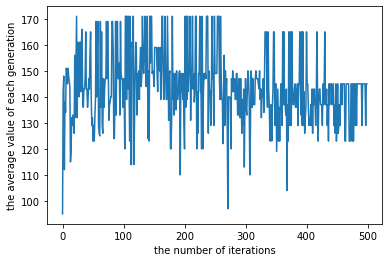

In [9]:
plt.plot(x)
plt.xlabel('the number of iterations')
plt.ylabel('the average value of each generation')